# Arctic Amplification and New York State Temperature Anomalies

Temperature Anomalies using CFSR Data

---

## Overview

Introductory paragraph here ... blah blah AA using CFSR Data, and NYS using NYSM w only 6 years..

1. Section 1: Create Monthly Mean Datasets by Year from 1979-2022 using CFSR Data
2. Section 2: Arctic Amplification Study using CFSR Data
3. Third Content Section

## Prerequisites
Not sure if I want to add these

---

## Imports

In [1]:
import xarray as xr
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime #remove for final version
import os


## Section 1: Create Monthly Mean Datasets by Year from 1979-2022 using CFSR Data

This section is for ***Reference Only*** because the monthly mean computations take a long time to run at ~6 minutes per year (over 4 hours for the full 43 years of data). This code has already been ran and net cdf files have been saved out locally, so those files can be read in and used as pre-computed datasets for later parts of this notebook.

Data source: Climate Forecast System Renanalysis, https://climatedataguide.ucar.edu/climate-data/climate-forecast-system-reanalysis-cfsr

Local copies (/cfsr/data/) of CFSR datasets were used in this notebook.

Referenced notebooks: UAlbany ATM622 Jupyter notebook https://brian-rose.github.io/general-circulation/lectures/computing-seasonal.html
 

### Define functions
Functions are used when creating and saving each monthly mean dataset by year

In [ ]:
def make_dir(path):
    """ 
    Input directory path as string
    Creates the directory if it doesn't already exist
    """ 
    if not os.path.exists(path):
        os.makedirs(path)
        
def open_ds(yr):
    """ Open dataset using dask """
    ds = xr.open_mfdataset(f'/cfsr/data/{yr}/{var}.{yr}.0p5.anl.nc', chunks={'time':30*4, 'lev': 4}, parallel=True) # removed this before /cfsr "/network/daes"
    return ds

def compute_save_means(ds_for_mean, yr):
    
    """ 
    Input dataset based depends on whether grouping seasonally, annually, etc.
    Perform lazy execution averaging on the input dataset
    Calculation is executed when saving to path
    """
    ds_mean = ds_for_mean.mean(dim=('lon','time'), skipna=True)
    save_path = f'{save_dir}/{group_desc}_{var}_{yr}.nc'
    ds_mean.to_netcdf(save_path)
    print(save_path) #comment out for final version
    print(f"finished {yr} at {datetime.datetime.now()}") #comment out for final version
    

### Create and save monthly mean temperature datasets for each year from 1979-2022

#### Define Variables

In [ ]:
# Define CFSR variable of interest (e.g. temperature is 't') 
var = 't' 

# Describes how data should be grouped for averaging, used in file and directory names
group_desc = 'monthly' 

# Directory where averaged net cdf files will be saved out
save_dir = f'/home11/grad/2021/cs436778/general-circulation/project/data/{group_desc}'

# Years of CFSR data to include; each will be looped over
years = range(1979, 2023)

#### Execute monthly mean calculation for each year and save dataset

In [ ]:
# execute function monthl

make_dir(save_dir)

for year in years:

    ds = open_ds(year)

    # group dataframe depending on seasonal, annual, monthly means
    ds_grouped = ds.groupby(ds.time.dt.month)

    compute_save_means(ds_grouped, year)

### Create and save annual mean temperature datasets for each year from 1979-2022

#### Define Variables

In [ ]:
# Define CFSR variable of interest (e.g. temperature is 't') 
var = 't' 

# Describes how data should be grouped for averaging, used in file and directory names
group_desc = 'annual' 

# Directory where averaged net cdf files will be saved out
save_dir = f'/home11/grad/2021/cs436778/general-circulation/project/data/{group_desc}'

# Years of CFSR data to include; each will be looped over
years = range(1979, 2023)

#### Execute monthly mean calculation for each year and save dataset

In [ ]:
# execute function monthl

make_dir(save_dir)

for year in years:

    ds = open_ds(year)

    # group dataframe depending on seasonal, annual, monthly means
    ds_grouped = ds.groupby(ds.time.dt.year)

    compute_save_means(ds_grouped, year)

## Section 2: Arctic Amplification Study using CFSR Data

Recreate figures 1A and 2A from **Francis & Vavrus 2015**. Citation and link to paper: Jennifer A Francis and Stephen J Vavrus 2015 Environ. Res. Lett. 10 014005,  https://iopscience.iop.org/article/10.1088/1748-9326/10/1/014005#erl507077bib8

### Subsection 2.1: Annual Mean Temperature Anomalies Figure
- Analogous to Francis & Vavrus Figure 1A: Annual-mean anomalies in air temperature for 40–80°N 
- **Annual anomaly** is defined as the difference in annual mean relative to the **1989-2018 mean** (30 years)
    - Note that this is updated from Francis & Vavrus' available data from 1981–2010 (30 years)
- Anomalies in air temperature are calculated for each year from **2003 through 2021** (19 years) and averaged to get annual-mean anomalies which are plotted by latitude and elevation. 
    - Note that this is updated from Francis & Vavrus' anomalies calculatued for 1995 through 2013 (19 years).
- Thus, all data ranges have been shifted forward 8 years

#### Define Variables

In [179]:
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'

# Define the years of data to use for Avg Temp Anomalies, both the years to calculate and the relative mean to subtract
years_calc = range(2003, 2022)
years_relative = range(1989, 2019)

#### Read in pre-computed annual mean datasets

In [181]:
# List all files from parent dir with the years defined
t_files_years_calc = []
for year in years_calc: 
    t_files_years_calc.append(f"{dir_annual_t}annual_t_{year}.nc")
    
# List all files from parent dir with the years defined
t_files_years_relative = []
for year in years_relative: 
    t_files_years_relative.append(f"{dir_annual_t}annual_t_{year}.nc")
    
# Read in datasets using dask
ds_years_calc = xr.open_mfdataset(t_files_years_calc, chunks={'time':30*4, 'lev': 4}, parallel=True)
ds_years_relative = xr.open_mfdataset(t_files_years_relative, chunks={'time':30*4, 'lev': 4}, parallel=True)

#### Calculate mean temp 1989 - 2018 to be used as relative temp in anomaly calculation

In [184]:
t_rel = ds_years_relative.mean(dim=('year'))
t_rel

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate mean temp for 2003 - 2021

Note that averaging and over 2003-2021 and then subtracting the relative temperature is *equivalent* to subtracting the relative temperature from each year (resulting in temp anomalies by year) and then averaging

In [185]:
t_calc = ds_years_calc.mean(dim=('year'))
t_calc

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate the annual-mean anomalies in air temperature by subtracting the two mean datasets created above


In [187]:
t_anom = t_calc - t_rel

#### Subset dataset to latitudes of interest, 40N-80N and reformat data for easy plotting

In [192]:
t_anom = t_anom.sel(lat=slice(40,80))
t_anom_da = t_anom.to_array(dim='t').squeeze(dim=["t"], drop = True) # reformats the data for easy plotting
t_anom_da

<xarray.DataArray (lev: 32, lat: 81)>
dask.array<getitem, shape=(32, 81), dtype=float32, chunksize=(4, 81), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 40.0 40.5 41.0 41.5 42.0 ... 78.0 78.5 79.0 79.5 80.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0

#### Plot annual-mean temperature anomalies for 40N-80N

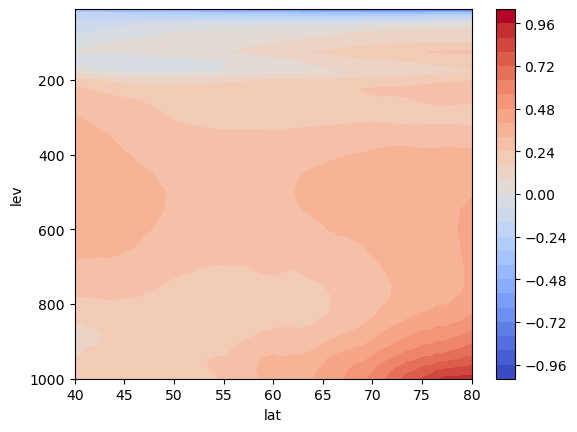

In [204]:
plt  = xr.plot.contourf(t_anom_da, x = 'lat', y = 'lev', levels = 30, yincrease=False, cmap = 'coolwarm')

### Subsection 2.2: Arctic Amplification Time Series

- Arctic Amplification defined as the difference in 1000 hPa temperature anomalies (relative to 1979–2021 mean), between the Arctic (70–90°N) and mid-latitudes (30–60°N)
    - Note that this is updated from Francis & Vavrus' available data from 1948–2013 mean

- Analogous to Figure 2A

#### Read in pre-computed monthly and annual mean datasets

In [201]:
# Define the parent dir where annual temp data lives
# dir_seasonal_t = '/home11/grad/2021/cs436778/general-circulation/project/data/seasonal/'
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'
dir_monthly_t = '/home11/grad/2021/cs436778/general-circulation/project/data/monthly/'

# Define the years of data for Arctic Amplification Calculation
years = range(1979,2022)

leap = ['1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']

#### Define Functions 
For the mid-latitudes and the arctic, must calculate annual and seasonal means 1) by year and 2) as long-term climatologies over 43 years from 1979-2022

In [148]:
def latrange_mean(dataset, elev_p, latrange):
    """ 
    For each year, read in the seasonal dataset and subset by elevation and latitude range (ex: arctic and mid latitudes regions)
    Calculate the region's latitude-weighted mean temperature for each season
    """
    latrange = dataset.t.sel(lev=elev_p, lat = latrange)
    latrange_weights = np.cos(np.deg2rad(latrange.lat))
    latrange_mean = latrange.weighted(latrange_weights).mean(dim = 'lat')
    return latrange_mean
    
    
def add_to_dict(dict_name, key_name, val):
    """ 
    Append value to a specific key in dictionary if the key already exists
    Otherwise, if key doesn’t exist in dictionary, add a new key and its value to the dictionary 
    """
    if key_name in dict_name:
        if type(dict_name[key_name]) is not list:
            key_current_val = [dict_name[key_name]]
        else:
            key_current_val = dict_name[key_name]
        key_current_val.append(val)
        dict_name[key_name] = key_current_val
    else:
        dict_name[key_name] = val    
        
def yearly_monthly_means(dataset, dict_name):
    """
    For each season, track the year, season, and mean value (three keys)
    Returns a dictionary of the tracked data 
    """
    for month_num in range(1,13):
        month_val = dataset.sel(month = month_num).values.item()
        add_to_dict(dict_name, month_num, month_val)
        
def year_month_length(yr, dictname):
    """
    Identifies the length of day in a month or year depending on leap year
    Note: These lengths will be used for calculating seasonal and annual climatologies rather than using xarray's built in averaging over 'time.season' which is DJF rather than JFM
    """
    if yr in leap:
        add_to_dict(dictname, 'count_2', 29)
        add_to_dict(dictname, 'count_year', 366)
    else: 
        add_to_dict(dictname, 'count_2', 28)
        add_to_dict(dictname, 'count_year', 365)
    add_to_dict(dictname, 'count_1', 31)
    add_to_dict(dictname, 'count_3', 31)
    add_to_dict(dictname, 'count_4', 30)
    add_to_dict(dictname, 'count_5', 31)
    add_to_dict(dictname, 'count_6', 30)
    add_to_dict(dictname, 'count_7', 31)
    add_to_dict(dictname, 'count_8', 31)
    add_to_dict(dictname, 'count_9', 30)
    add_to_dict(dictname, 'count_10', 31)
    add_to_dict(dictname, 'count_11', 30)
    add_to_dict(dictname, 'count_12', 31)


def dict_month_data(plevel, lat_low, lat_high):
    """
    Create dictionary of temp data by month and year for a given latitude range and pressure level
    """
    new_dict = {}
    for year in years:
        
        # add year to dictionary
        year = str(year)
        add_to_dict(new_dict, 'year_name', year)
        
        # open datasets
        ds_year_month = xr.open_mfdataset(f"{dir_monthly_t}monthly_t_{year}.nc")
        ds_year = xr.open_mfdataset(f"{dir_annual_t}annual_t_{year}.nc")

        # subset datasets
        lat_avg_months = latrange_mean(ds_year_month, plevel, slice(lat_low,lat_high))
        lat_avg_year = latrange_mean(ds_year, plevel, slice(lat_low,lat_high))
        
        # add subsetted data to dictionary
        yearly_monthly_means(lat_avg_months, new_dict)
        add_to_dict(new_dict, 'annual', lat_avg_year.values.item())
        
        # add month length and year length to dictionary accounting for leap years
        year_month_length(year, new_dict)
            
    return new_dict

 
def seasonal_climatology(region_dict, months_ls):
    """ 
    Calculate seasonal climatologies, used for calculating anomalous temp
    Input regional dictionary of temps by month (e.g. arctic_dict made above) 
    Input list of month numbers to be averaged to create season (e.g. input list [1,2,3] to average Jan, Feb, Mar)
    Returns weighted average value (weighted by month length) and the length of season
    """
    month_values = region_dict[months_ls[0]] + region_dict[months_ls[1]] + region_dict[months_ls[2]]
    month_num_days = region_dict[f"count_{str(months_ls[0])}"] + region_dict[f"count_{str(months_ls[1])}"] + region_dict[f"count_{str(months_ls[2])}"]
    season_mean = np.average(month_values, weights = month_num_days)
    season_num_days = sum(month_num_days)
    return season_mean, season_num_days


def seasonal_anom(region_dict, months_ls, season_clim):
    """ 
    Create time series of temp anomalies by year & season 
    Input regional dictionary of temps 
    Input list of month numbers to be averaged to create season (e.g. input list [1,2,3] to average Jan, Feb, Mar)
    For each year, calculate the seasonal anomaly by averaging that season's months and then subtracting the seasonal climatology
    Returns timeseries list of seasonal temp anomalies from Winter 1979 through Fall 2021, seasonal weighted average value (weighted by month length) of season
    """
    season_t_ls = []
    for year_ind in range(0, len(region_dict['year_name'])):
        month_values = [region_dict[months_ls[0]][year_ind], region_dict[months_ls[1]][year_ind], region_dict[months_ls[2]][year_ind]]
        month_num_days = [region_dict[f"count_{str(months_ls[0])}"][year_ind], region_dict[f"count_{str(months_ls[1])}"][year_ind], region_dict[f"count_{str(months_ls[2])}"][year_ind]]
        season_mean = np.average(month_values, weights = month_num_days)
        season_t_ls.append(season_mean-season_clim)
    return season_t_ls

def annual_climatology(years_ls, plevel, lat_low, lat_high):
    """ 
    Calculate annual climatology for a given range of years, pressure level, and region (slice from lat_low to lat_high)
    """
    files_allyears = []
    for year in years_ls: 
        files_allyears.append(f"{dir_annual_t}annual_t_{year}.nc")

    ds_years = xr.open_mfdataset(files_allyears , chunks={'time':30*4, 'lev': 4}, parallel=True)

    latrange = ds_years.t.sel(lev=plevel, lat = slice(lat_low,lat_high))
    latrange_weights = np.cos(np.deg2rad(latrange.lat))
    latrange_mean = latrange.weighted(latrange_weights).mean(dim = 'lat')

    t_ann = latrange_mean.mean(dim=('year'))
    t_avg = t_ann.values.item()
    return t_avg

def annual_anom(region_dict, annual_clim):
    """ 
    Create time series of temp anomalies by year
    Input regional dictionary of temps
    Input annual climatology (relative temp for anomaly calc)
    For each year, calculate the annual anomaly by subtracting the seasonal climatology
    Returns timeseries list of seasonal temp anomalies from 1979 through 2021
    """
    annual_t_ls = []
    for year_ind in range(0, len(region_dict['year_name'])):
        annual_mean = region_dict['annual'][year_ind]
        annual_t_ls.append(annual_mean-annual_clim)
    return annual_t_ls


#### Create dictionaries holding monthly temperature from 1979 through 2022

In [51]:
midlat_dict_new = dict_month_data(1000, 30, 60)
arctic_dict_new = dict_month_data(1000, 70, 90)

#### Seasonal calculations

##### A) Seasonal climatologies

In [129]:
arctic_jfm_mean, arctic_jfm_len = seasonal_climatology(arctic_dict_new, [1,2,3])
midlat_jfm_mean, midlat_jfm_len = seasonal_climatology(midlat_dict_new, [1,2,3])

arctic_amj_mean, arctic_amj_len = seasonal_climatology(arctic_dict_new, [4,5,6])
midlat_amj_mean, midlat_amj_len = seasonal_climatology(midlat_dict_new, [4,5,6])

arctic_jas_mean, arctic_jas_len  = seasonal_climatology(arctic_dict_new, [7,8,9])
midlat_jas_mean, midlat_jas_len = seasonal_climatology(midlat_dict_new, [7,8,9])

arctic_ond_mean, arctic_ond_len  = seasonal_climatology(arctic_dict_new, [10,11,12])
midlat_ond_mean, midlat_ond_len = seasonal_climatology(midlat_dict_new, [10,11,12])

# Annual way 1
# arctic_annual_mean = np.average([arctic_jfm_mean, arctic_amj_mean, arctic_jas_mean, arctic_ond_mean], weights = [arctic_jfm_len, arctic_amj_len, arctic_jas_len, arctic_ond_len]) 
# midlat_annual_mean = np.average([midlat_jfm_mean, midlat_amj_mean, midlat_jas_mean, midlat_ond_mean], weights = [midlat_jfm_len, midlat_amj_len, midlat_jas_len, midlat_ond_len]) 

# Annual

##### B) Seasonal anomalies timeseries

In [154]:
arctic_jfm_anom = seasonal_anom(arctic_dict_new, [1,2,3], arctic_jfm_mean)
midlat_jfm_anom = seasonal_anom(midlat_dict_new, [1,2,3], midlat_jfm_mean)

arctic_amj_anom = seasonal_anom(arctic_dict_new, [4,5,6], arctic_amj_mean)
midlat_amj_anom = seasonal_anom(midlat_dict_new, [4,5,6], midlat_amj_mean)

arctic_jas_anom = seasonal_anom(arctic_dict_new, [7,8,9], arctic_jas_mean)
midlat_jas_anom = seasonal_anom(midlat_dict_new, [7,8,9], midlat_jas_mean)

arctic_ond_anom = seasonal_anom(arctic_dict_new, [10,11,12], arctic_ond_mean)
midlat_ond_anom = seasonal_anom(midlat_dict_new, [10,11,12], midlat_ond_mean)

#### Annual calculations

##### A) Annual climatology

In [155]:
arctic_ann_mean = annual_climatology(years, 1000, 70, 90)
midlat_ann_mean = annual_climatology(years, 1000, 30, 60)

##### B) Annual anomalies timeseries

In [156]:
arctic_ann_anom = annual_anom(arctic_dict_new, arctic_ann_mean)
midlat_ann_anom = annual_anom(midlat_dict_new, midlat_ann_mean)

#### Calculate Arctic Amplification (AA) time series by season & annually

In [173]:
winter = np.array(arctic_jfm_anom) - np.array(midlat_jfm_anom)
spring = np.array(arctic_amj_anom) - np.array(midlat_amj_anom)
summer = np.array(arctic_jas_anom) - np.array(midlat_jas_anom)
fall = np.array(arctic_ond_anom) - np.array(midlat_ond_anom)
annual = np.array(arctic_ann_anom) - np.array(midlat_ann_anom)


#### Plot Arctic Amplification Time Series

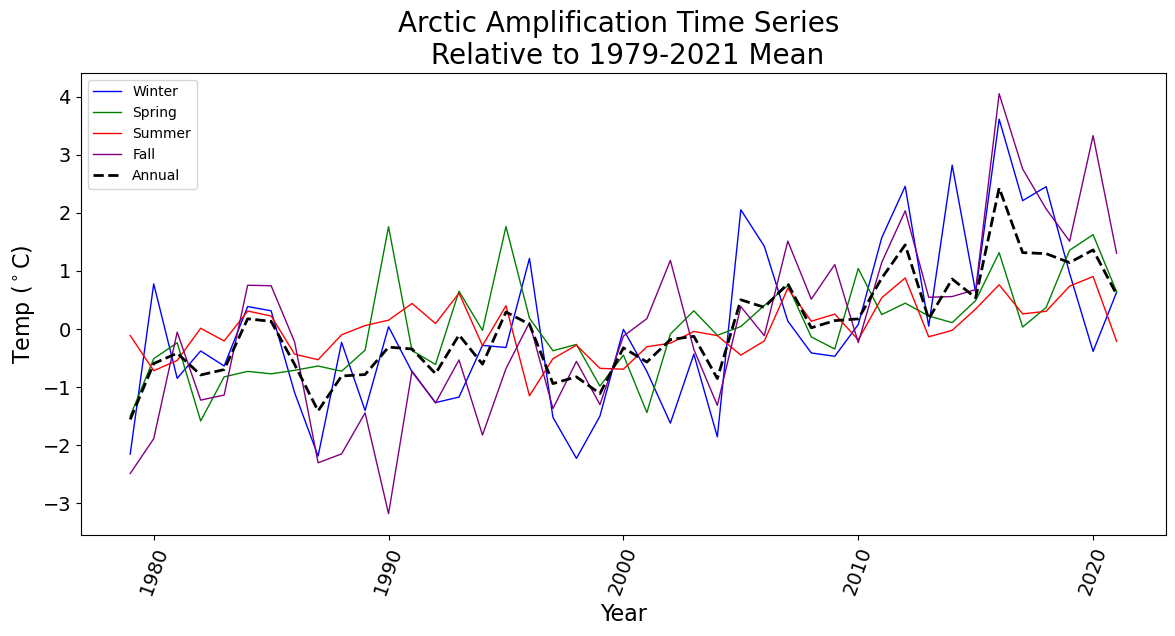

In [174]:
# Create figure of a particular size
fig = plt.figure(figsize=(14, 6))

# add plot
ax1 = fig.add_subplot(1, 1, 1)

# plot values
ax1.plot(years, winter, label='Winter', color='blue',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, spring, label='Spring', color='green',linewidth=1, markersize = 6) # , marker='o'
ax1.plot(years, summer, label='Summer', color='red',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, fall, label='Fall', color='purple',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, annual, label='Annual', color='black',linewidth=2, linestyle='--', markersize = 6) #, marker='o'


ax1.set_title('Arctic Amplification Time Series \n Relative to 1979-2021 Mean', size = 20)
ax1.set_xlabel('Year', size = 16)
ax1.set_ylabel('Temp ($^\circ$C)', size = 16)
ax1.tick_params(axis='x', labelrotation = 70, labelsize=14)
ax1.tick_params(axis='y',  labelsize=14)

ax1.legend(loc='upper left')

#### Subset to 2017-2021 data for comparing to NYSM in next section


In [220]:
yrs_nysm = years[38:43]
winter_nysm = winter[38:43]
spring_nysm = spring[38:43]
summer_nysm = summer[38:43]
fall_nysm = fall[38:43]
annual_nysm = annual[38:43]

## Third Content Section

___

## Summary

Paragraph